
Step 2: Basic inspection of dataset
Shape of dataset: (732, 15)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None

First five rows:

C:\Users\yjlin\AppData\Local\Temp\ipykernel_30860\3147990621.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


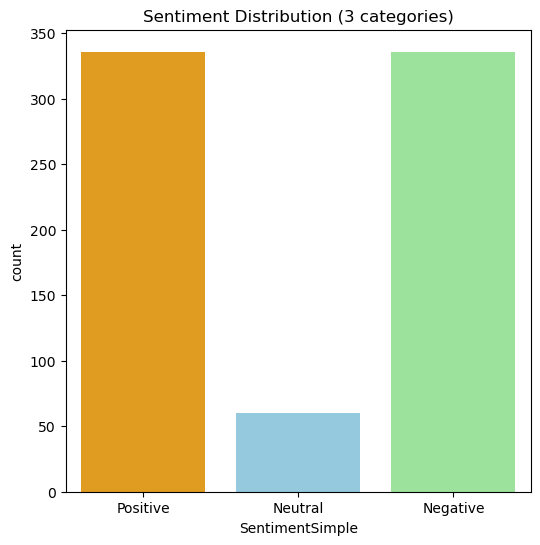


Step 5: Platform Distribution (with simplified sentiments)


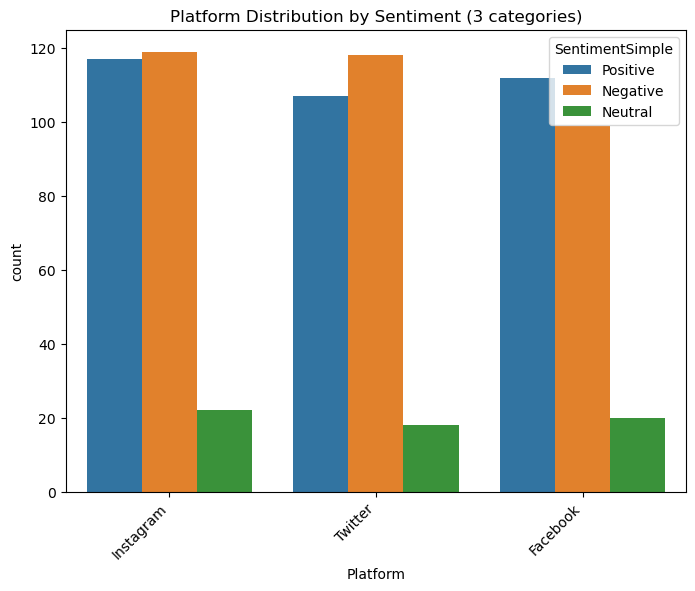


Step 6: Sentiment by Country (Top 10 countries, simplified sentiments)


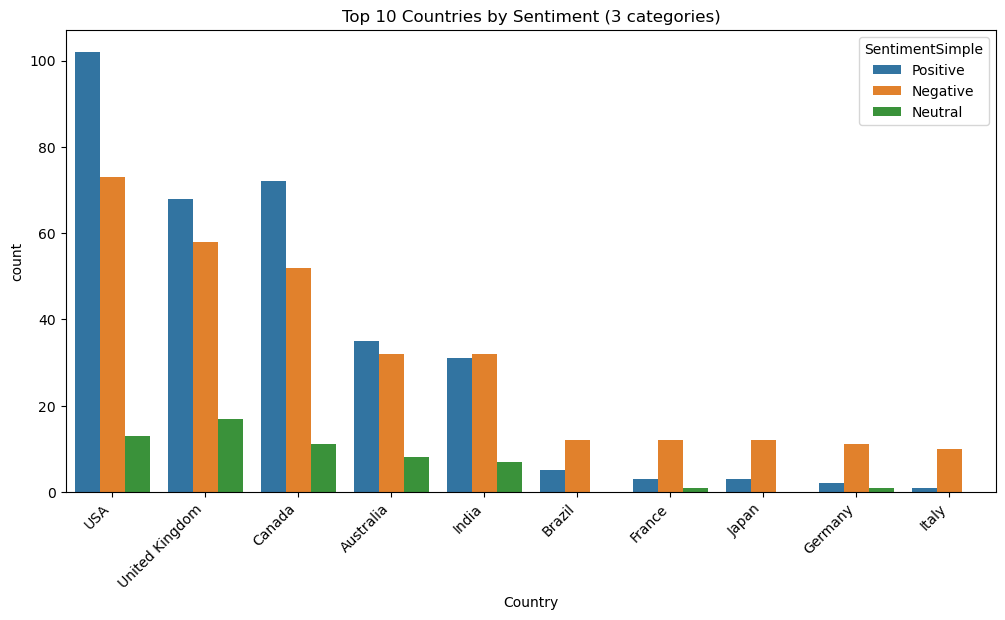


Step 7: Engagement Analysis (Retweets vs Likes, simplified sentiments)


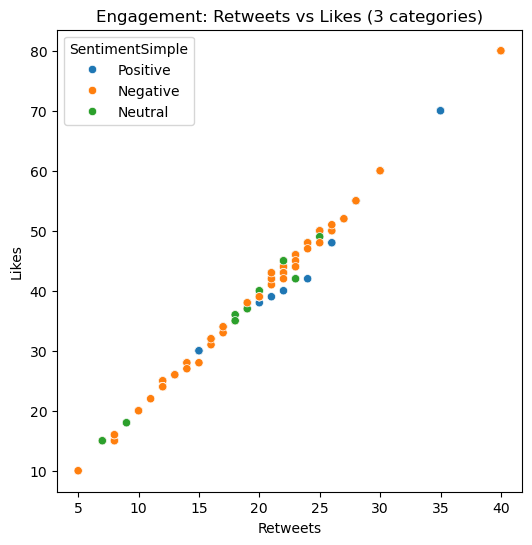


Step 8: Yearly Sentiment Trend (Positive / Neutral / Negative)


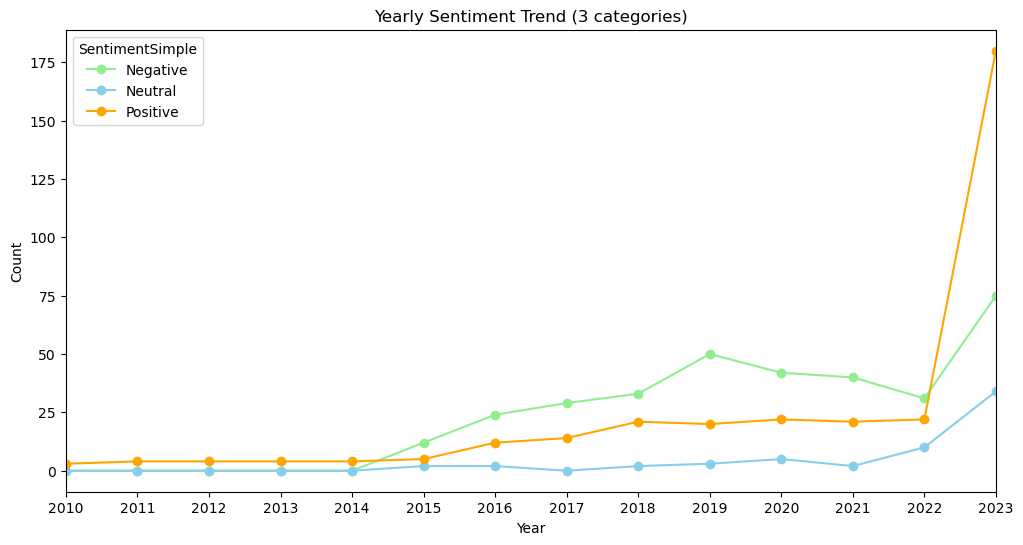


Step 9: Text Length Distribution


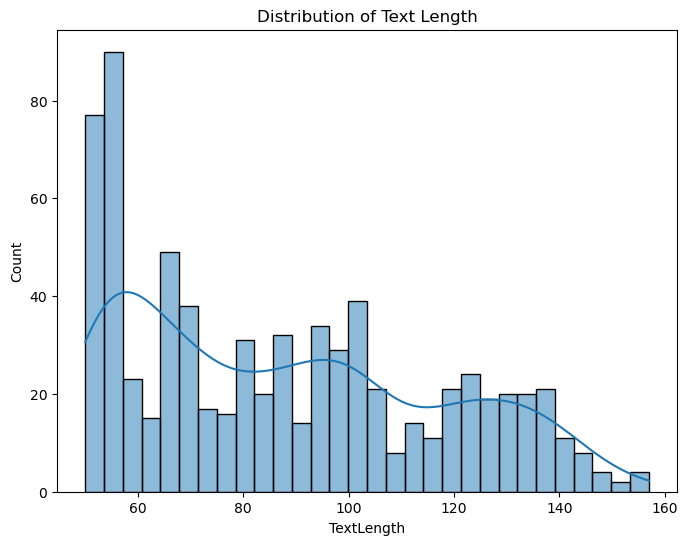


Step 10: Sentiment Proportion Pie Chart (Positive / Neutral / Negative)


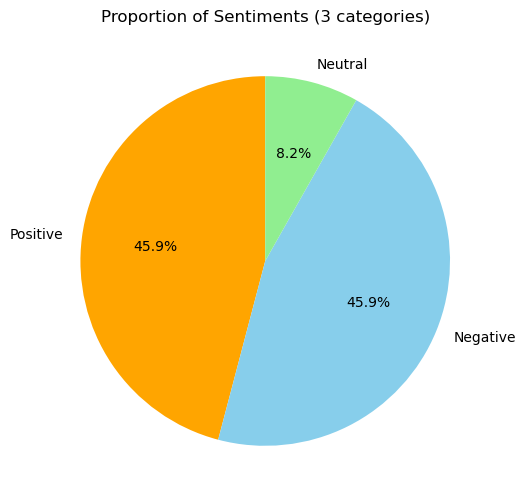


Step 11: Engagement by Sentiment (平均 Retweets / Likes)
                 Retweets  Likes
SentimentSimple                 
Negative            21.18  42.25
Neutral             19.58  38.97
Positive            22.18  44.26


<Figure size 800x600 with 0 Axes>

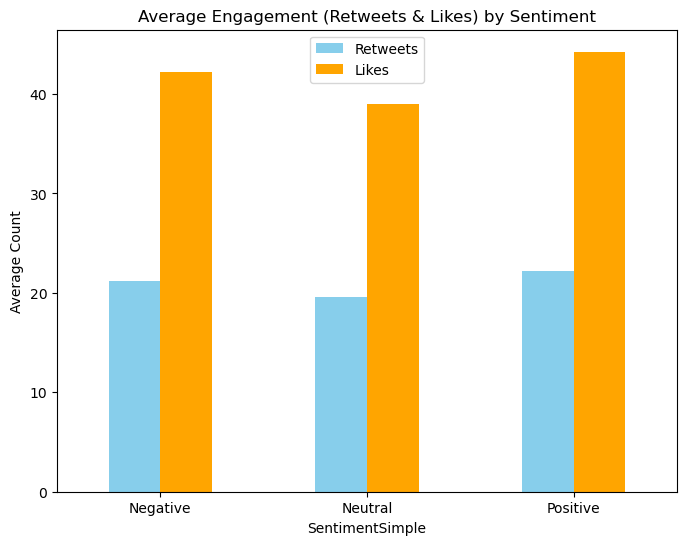


Step 12: Engagement Distribution by Sentiment


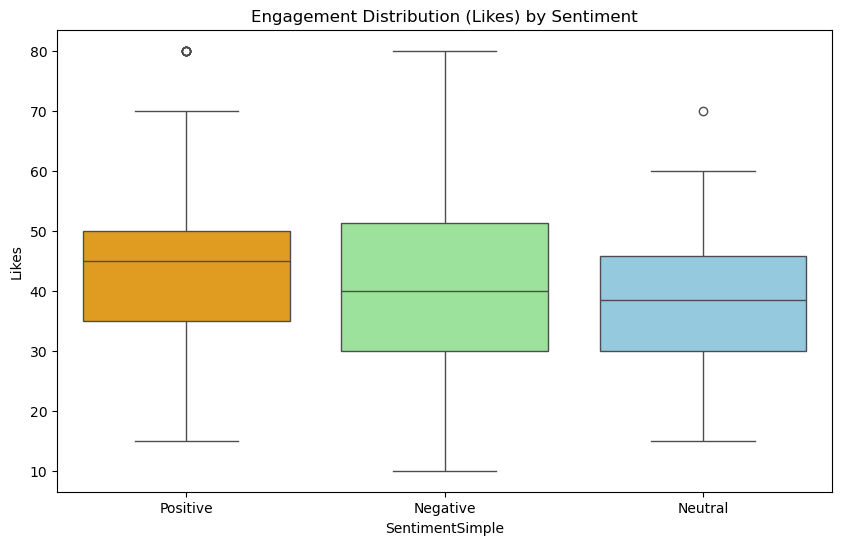

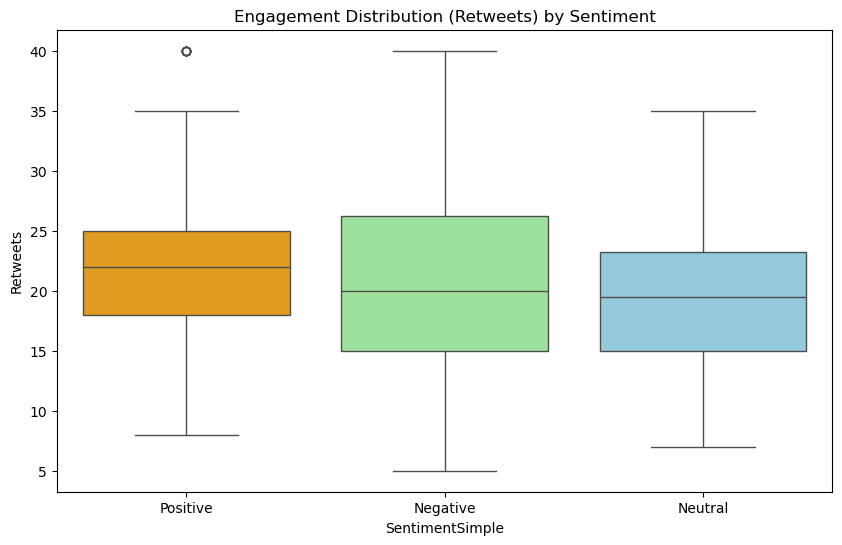


Step 13: Engagement Correlation by Sentiment


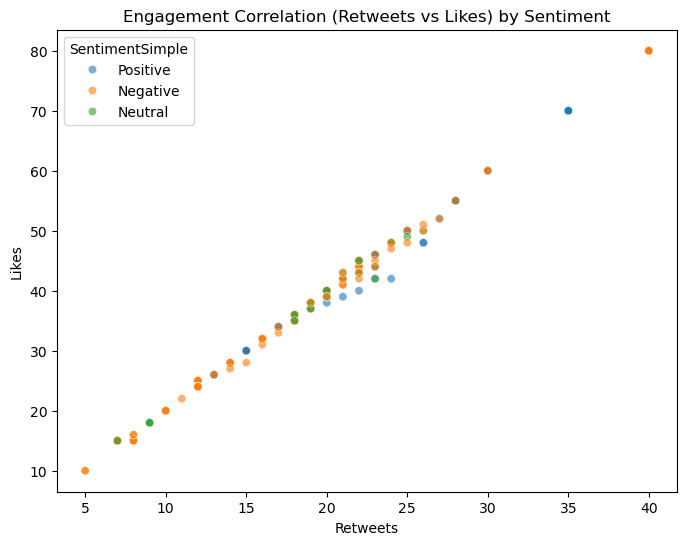


Step 14: Text Length Distribution by Sentiment


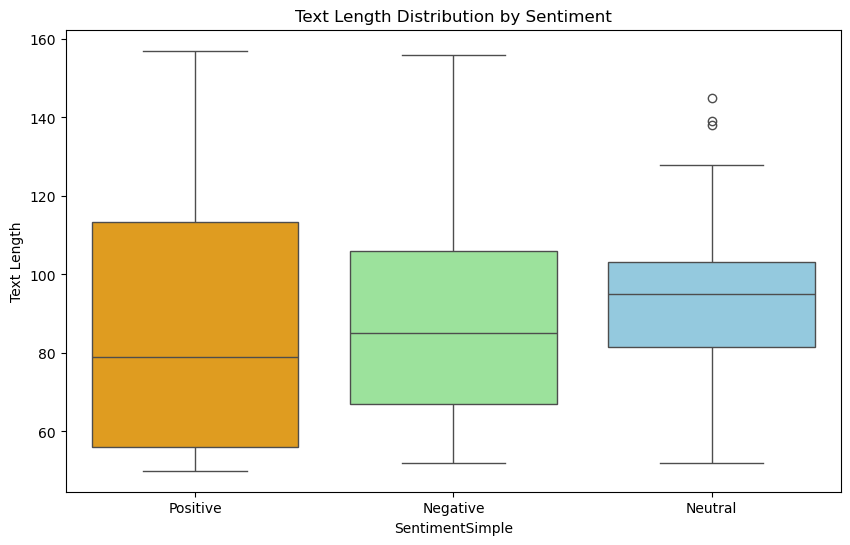


Step 15: Text Length vs Engagement (Likes / Retweets)


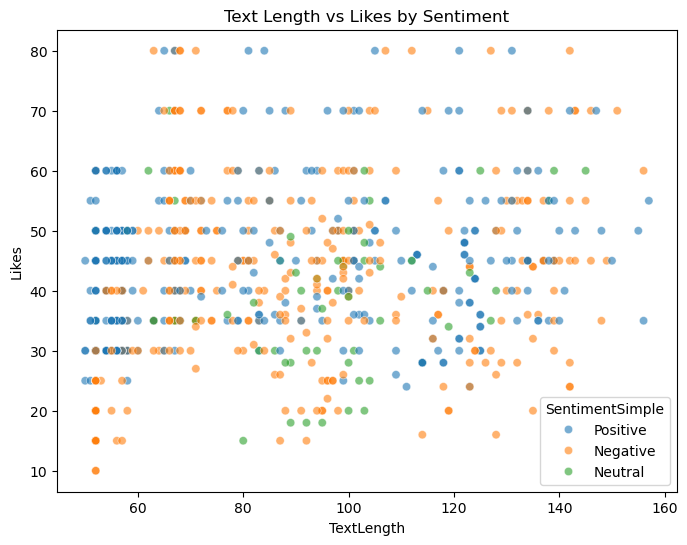

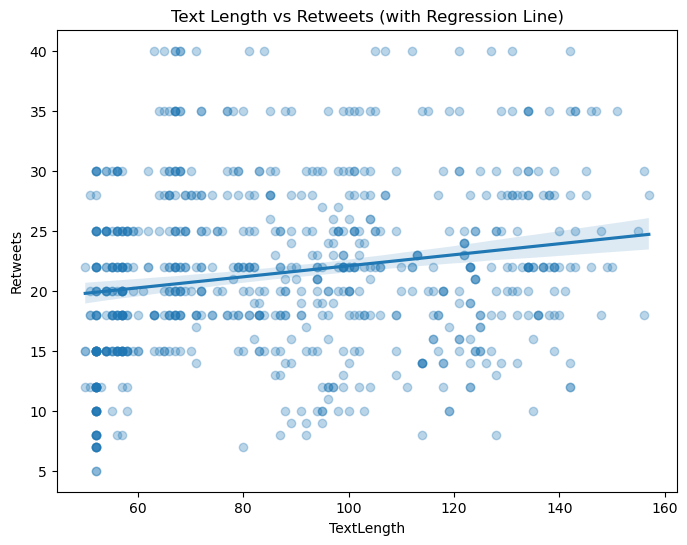


Step 16: Sentiment Distribution by Text Length Group


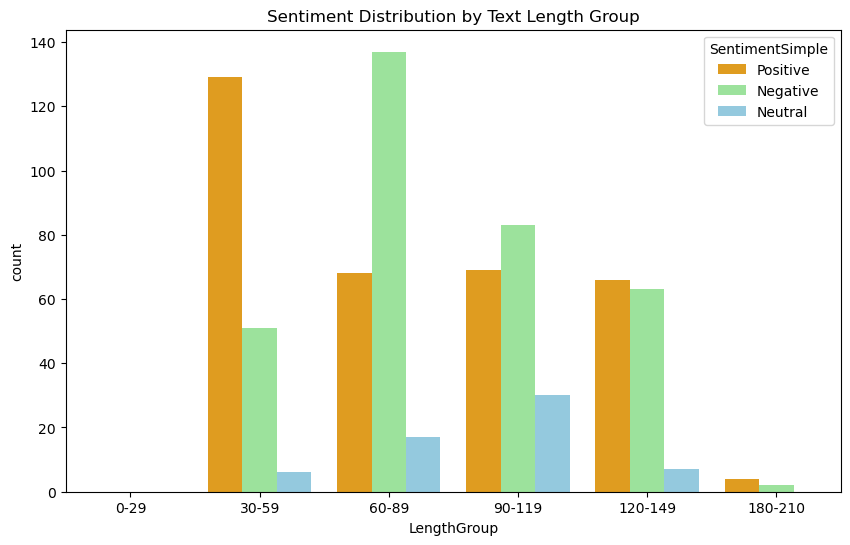


Step 17: Average Engagement by Text Length Group


Text(0, 0.5, 'Average Likes / Retweets')

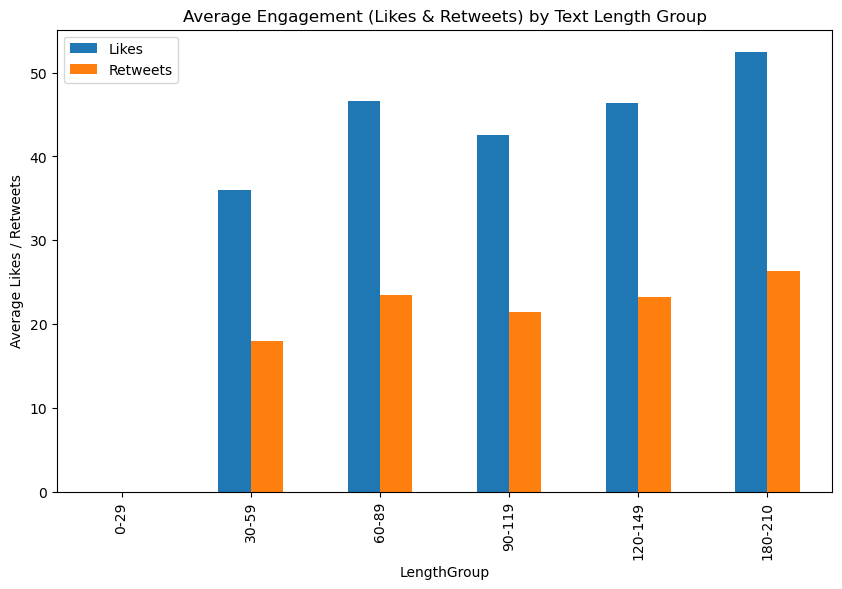

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 1. Load dataset
# =========================
df = pd.read_csv("../data/sentimentdataset.csv", encoding="utf-8")

# =========================
# 2. Basic inspection + Cleaning
# =========================
print("\nStep 2: Basic inspection of dataset")
print("Shape of dataset:", df.shape)
print("\nColumn info:")
print(df.info())
print("\nFirst five rows:")
print(df.head())

# --- Clean Platform ---
print("\nCleaning Platform column...")
df["Platform"] = df["Platform"].astype(str).str.strip()                 # Remove leading/trailing spaces
df["Platform"] = df["Platform"].str.replace(r"\s+", " ", regex=True)    # Replace multiple spaces with single space
df["Platform"] = df["Platform"].str.title()                             # Standardize case
print("Unique platforms after cleaning:", df["Platform"].unique())

# --- Clean Country ---
print("\nCleaning Country column...")
df["Country"] = df["Country"].astype(str).str.strip()                   # Remove leading/trailing spaces
df["Country"] = df["Country"].str.replace(r"\s+", " ", regex=True)      # Replace multiple spaces with single space
df["Country"] = df["Country"].str.title()                               # Standardize case

# Map variations to standardized names
country_mapping = {
    "Usa": "USA",
    "U.S.": "USA",
    "United States": "USA",
    "United States Of America": "USA",
    "Uk": "United Kingdom",
    "U.K.": "United Kingdom",
    "England": "United Kingdom",
    "Korea": "South Korea"
}
df["Country"] = df["Country"].replace(country_mapping)

print("Unique countries after cleaning:", df["Country"].unique()[:20])

# =========================
# 3. Simplify Sentiments into Positive / Neutral / Negative
# =========================
print("\nStep 3: Simplifying sentiments into Positive / Neutral / Negative")

sentiment_categories = {
    "Positive": [
        "Positive", "Happiness", "Joy", "Love", "Amusement", "Enjoyment",
        "Admiration", "Affection", "Awe", "Surprise", "Acceptance",
        "Adoration", "Anticipation", "Calmness", "Excitement", "Kind",
        "Pride", "Elation", "Euphoria", "Contentment", "Serenity",
        "Gratitude", "Hope", "Empowerment", "Compassion", "Tenderness",
        "Enthusiasm", "Fulfillment", "Reverence", "Zest", "Hopeful",
        "Proud", "Grateful", "Empathetic", "Compassionate", "Playful",
        "Inspired", "Confident", "Optimism", "Positivity", "Kindness",
        "Friendship", "Success", "Satisfaction", "Triumph", "Heartwarming"
    ],
    "Neutral": [
        "Neutral", "Confusion", "Indifference", "Curiosity", "Ambivalence",
        "Reflection", "Contemplation", "Acceptance", "Serenity", "Calmness"
    ],
    "Negative": [
        "Negative", "Anger", "Fear", "Sadness", "Disgust", "Disappointed",
        "Bitter", "Shame", "Despair", "Grief", "Loneliness", "Jealousy",
        "Resentment", "Frustration", "Boredom", "Anxiety", "Intimidation",
        "Helplessness", "Envy", "Regret", "Melancholy", "Nostalgia",
        "Yearning", "Fearful", "Apprehensive", "Overwhelmed", "Devastated",
        "Dismissive", "Heartbreak", "Betrayal", "Suffering", "Loss",
        "Isolation", "Exhaustion", "Sorrow", "Darkness", "Desperation",
        "Ruins", "Desolation", "Hate", "Bad", "Sad"
    ]
}

# Create a table of sentiment categories
df_sentiments = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in sentiment_categories.items()]))
print("\nSentiment Categories Table:")
print(df_sentiments)

# Function to simplify sentiment
def simplify_sentiment(s):
    s = str(s).strip()
    if s in sentiment_categories["Positive"]:
        return "Positive"
    elif s in sentiment_categories["Neutral"]:
        return "Neutral"
    else:
        return "Negative"

df["SentimentSimple"] = df["Sentiment"].apply(simplify_sentiment)
print("Unique simplified sentiments:", df["SentimentSimple"].unique())

# =========================
# 4. Sentiment Distribution
# =========================
print("\nStep 4: Sentiment Distribution (Positive / Neutral / Negative)")

sentiment_order = ["Positive", "Neutral", "Negative"]
sentiment_palette = {"Positive": "orange", "Neutral": "skyblue", "Negative": "lightgreen"}

plt.figure(figsize=(6,6))
sns.countplot(
    x="SentimentSimple",
    data=df,
    order=sentiment_order,
    palette=[sentiment_palette[s] for s in sentiment_order]
)
plt.title("Sentiment Distribution (3 categories)")
plt.show()

# =========================
# 5. Platform Distribution
# =========================
print("\nStep 5: Platform Distribution (with simplified sentiments)")

plt.figure(figsize=(8,6))
sns.countplot(x="Platform", hue="SentimentSimple", data=df,
              order=df["Platform"].value_counts().index)
plt.title("Platform Distribution by Sentiment (3 categories)")
plt.xticks(rotation=45, ha="right")
plt.show()

# =========================
# 6. Sentiment by Country (Top 10 countries)
# =========================
print("\nStep 6: Sentiment by Country (Top 10 countries, simplified sentiments)")

top_countries = df["Country"].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.countplot(x="Country", hue="SentimentSimple",
              data=df[df["Country"].isin(top_countries)],
              order=top_countries)
plt.title("Top 10 Countries by Sentiment (3 categories)")
plt.xticks(rotation=45, ha="right")
plt.show()

# =========================
# 7. Engagement Analysis
# =========================
print("\nStep 7: Engagement Analysis (Retweets vs Likes, simplified sentiments)")

plt.figure(figsize=(6,6))
sns.scatterplot(x="Retweets", y="Likes", hue="SentimentSimple", data=df)
plt.title("Engagement: Retweets vs Likes (3 categories)")
plt.show()

# =========================
# 8. Yearly Sentiment Trend
# =========================

print("\nStep 8: Yearly Sentiment Trend (Positive / Neutral / Negative)")

# Convert timestamp to datetime and extract year
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Year"] = df["Timestamp"].dt.year

# Group by year and sentiment
yearly_sentiment = df.groupby(["Year","SentimentSimple"]).size().unstack(fill_value=0)

# Ensure index covers all years up to 2023
all_years = pd.Index(range(yearly_sentiment.index.min(), 2024))  # include 2023
yearly_sentiment = yearly_sentiment.reindex(all_years, fill_value=0)

# Plot
ax = yearly_sentiment.plot(kind="line", figsize=(12,6),
                           color={"Positive":"orange","Neutral":"skyblue","Negative":"lightgreen"},
                           marker="o")
plt.title("Yearly Sentiment Trend (3 categories)")
plt.ylabel("Count")
plt.xlabel("Year")

# Force x-axis to stop at 2023
plt.xlim(yearly_sentiment.index.min(), 2023)

# Show every year tick from min to 2023
plt.xticks(range(yearly_sentiment.index.min(), 2024))

plt.show()


# =========================
# 9. Text Length Distribution
# =========================
print("\nStep 9: Text Length Distribution")

df["TextLength"] = df["Text"].astype(str).apply(len)
plt.figure(figsize=(8,6))
sns.histplot(df["TextLength"], bins=30, kde=True)
plt.title("Distribution of Text Length")
plt.show()

# =========================
# 10. Sentiment Proportion Pie Chart
# =========================
print("\nStep 10: Sentiment Proportion Pie Chart (Positive / Neutral / Negative)")

sentiment_counts = df["SentimentSimple"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index,
        autopct="%1.1f%%", startangle=90, colors=["orange","skyblue","lightgreen"])
plt.title("Proportion of Sentiments (3 categories)")
plt.show()

# =========================
# 11. Engagement by Sentiment
# =========================
print("\nStep 11: Engagement by Sentiment (平均 Retweets / Likes)")

engagement_summary = df.groupby("SentimentSimple")[["Retweets", "Likes"]].mean().round(2)
print(engagement_summary)

plt.figure(figsize=(8,6))
engagement_summary.plot(kind="bar", figsize=(8,6), color=["skyblue","orange"])
plt.title("Average Engagement (Retweets & Likes) by Sentiment")
plt.ylabel("Average Count")
plt.xticks(rotation=0)
plt.show()

# =========================
# 12. Engagement Distribution by Sentiment
# =========================
print("\nStep 12: Engagement Distribution by Sentiment")

plt.figure(figsize=(10,6))


sns.boxplot(x="SentimentSimple", y="Likes", 
            hue="SentimentSimple", data=df, 
            palette=sentiment_palette, legend=False)
plt.title("Engagement Distribution (Likes) by Sentiment")
plt.ylabel("Likes")
plt.show()

plt.figure(figsize=(10,6))


sns.boxplot(x="SentimentSimple", y="Retweets", 
            hue="SentimentSimple", data=df, 
            palette=sentiment_palette, legend=False)
plt.title("Engagement Distribution (Retweets) by Sentiment")
plt.ylabel("Retweets")
plt.show()

# =========================
# 13. Engagement Correlation by Sentiment
# =========================
print("\nStep 13: Engagement Correlation by Sentiment")

plt.figure(figsize=(8,6))
sns.scatterplot(x="Retweets", y="Likes", hue="SentimentSimple", data=df, alpha=0.6)
plt.title("Engagement Correlation (Retweets vs Likes) by Sentiment")
plt.show()


# =========================
# 14. Text Length Distribution by Sentiment
# =========================
print("\nStep 14: Text Length Distribution by Sentiment")

plt.figure(figsize=(10,6))
sns.boxplot(x="SentimentSimple", y="TextLength",
            hue="SentimentSimple", data=df,
            palette=sentiment_palette, legend=False)
plt.title("Text Length Distribution by Sentiment")
plt.ylabel("Text Length")
plt.show()


# =========================
# 15. Text Length vs Engagement
# =========================
print("\nStep 15: Text Length vs Engagement (Likes / Retweets)")

plt.figure(figsize=(8,6))
sns.scatterplot(x="TextLength", y="Likes", hue="SentimentSimple", data=df, alpha=0.6)
plt.title("Text Length vs Likes by Sentiment")
plt.show()

plt.figure(figsize=(8,6))
sns.regplot(x="TextLength", y="Retweets", data=df, scatter_kws={"alpha":0.3})
plt.title("Text Length vs Retweets (with Regression Line)")
plt.show()


# =========================
# 16. Text Length Grouping
# =========================
import numpy as np

print("\nStep 16: Sentiment Distribution by Text Length Group")


bins = np.arange(0, 181, 30)  
labels = [f"{i}-{i+29}" for i in bins[:-1]]  
labels[-1] = "180-210"  

df["LengthGroup"] = pd.cut(df["TextLength"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
sns.countplot(x="LengthGroup", hue="SentimentSimple", data=df, palette=sentiment_palette)
plt.title("Sentiment Distribution by Text Length Group")
plt.show()




# =========================
# 17. Engagement by Text Length Group
# =========================
print("\nStep 17: Average Engagement by Text Length Group")

engagement_by_length = df.groupby("LengthGroup", observed=False)[["Likes","Retweets"]].mean()

engagement_by_length.plot(kind="bar", figsize=(10,6))
plt.title("Average Engagement (Likes & Retweets) by Text Length Group")
plt.ylabel("Average Likes / Retweets")
